In [1]:
import pandas as pd
import numpy as np
from ANNbuilder import build_network
from pso_global_best_loss_history import pso_optimization, global_best_loss_history
from loss import mse_loss
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("banknote_authentication.csv", header=None)
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.shape

(1372, 5)

In [4]:
data.columns

Index([0, 1, 2, 3, 4], dtype='int64')

In [5]:
X = data.drop(4, axis=1).values
y = data[4].values.reshape(-1, 1)

In [6]:
X[:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ]])

In [7]:
# Data separation and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Pop_size adjusting

### Population size = 25

Iteration 25/300, Current Best Loss: 0.01738071165466526
Iteration 50/300, Current Best Loss: 0.010939869289252599
Iteration 75/300, Current Best Loss: 0.009708817708079066
Iteration 100/300, Current Best Loss: 0.007464579811506142
Iteration 125/300, Current Best Loss: 0.006954394041006546
Iteration 150/300, Current Best Loss: 0.004595505478656214
Iteration 175/300, Current Best Loss: 0.0038563881931853302
Iteration 200/300, Current Best Loss: 0.003718773140565432
Iteration 225/300, Current Best Loss: 0.0037036123477027006
Iteration 250/300, Current Best Loss: 0.0028655077188973078
Iteration 275/300, Current Best Loss: 0.002839518964591415
Iteration 300/300, Current Best Loss: 0.0028354802142147354
Final Best Loss: 0.0028354802142147354 on Iteration: 296
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.98      0.99       127

    accuracy                           0.99       275
   macro avg     

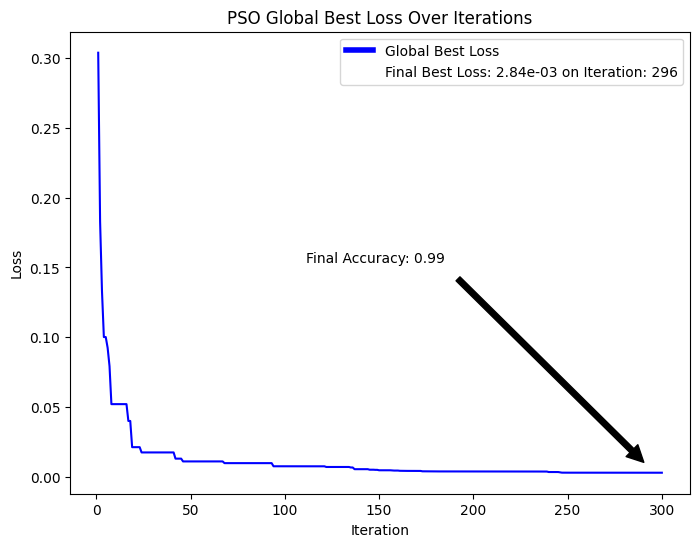

In [9]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=25,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### Population size = 50

Iteration 25/300, Current Best Loss: 0.03006511062361988
Iteration 50/300, Current Best Loss: 0.004654219048031615
Iteration 75/300, Current Best Loss: 0.002589184775738911
Iteration 100/300, Current Best Loss: 7.150483924442828e-06
Iteration 125/300, Current Best Loss: 1.6912859061244844e-10
Iteration 150/300, Current Best Loss: 1.6912859061244844e-10
Iteration 175/300, Current Best Loss: 1.6912859061244844e-10
Iteration 200/300, Current Best Loss: 1.6518846255136701e-12
Iteration 225/300, Current Best Loss: 8.381927088513221e-13
Iteration 250/300, Current Best Loss: 2.7643623415401346e-13
Iteration 275/300, Current Best Loss: 2.2674668266009894e-13
Iteration 300/300, Current Best Loss: 9.35565370874332e-14
Final Best Loss: 9.35565370874332e-14 on Iteration: 298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro

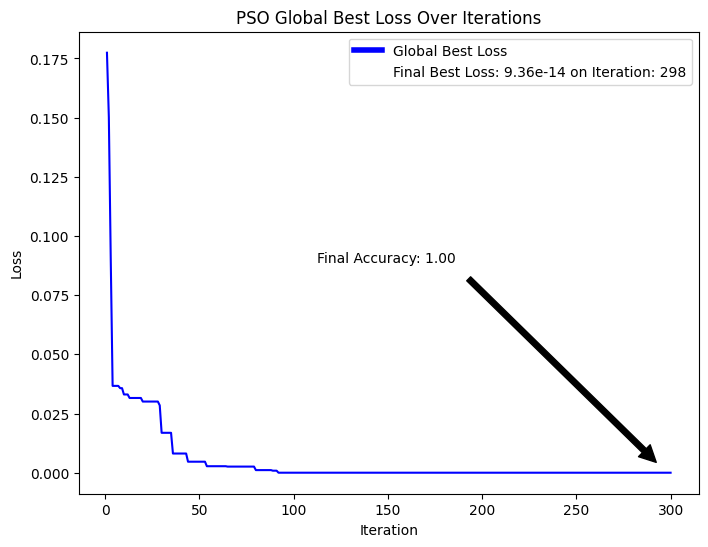

In [10]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### Population size = 100

Iteration 25/300, Current Best Loss: 0.032652044801709135
Iteration 50/300, Current Best Loss: 0.0158679457195031
Iteration 75/300, Current Best Loss: 0.008584640229388554
Iteration 100/300, Current Best Loss: 0.007536272647951948
Iteration 125/300, Current Best Loss: 0.001563490532607177
Iteration 150/300, Current Best Loss: 6.0264777868587215e-05
Iteration 175/300, Current Best Loss: 1.978401885782642e-06
Iteration 200/300, Current Best Loss: 1.6442137933969458e-07
Iteration 225/300, Current Best Loss: 1.438396464360521e-07
Iteration 250/300, Current Best Loss: 4.230094225440823e-08
Iteration 275/300, Current Best Loss: 2.98089392543898e-08
Iteration 300/300, Current Best Loss: 2.5941189679825935e-08
Final Best Loss: 2.5941189679825935e-08 on Iteration: 279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg

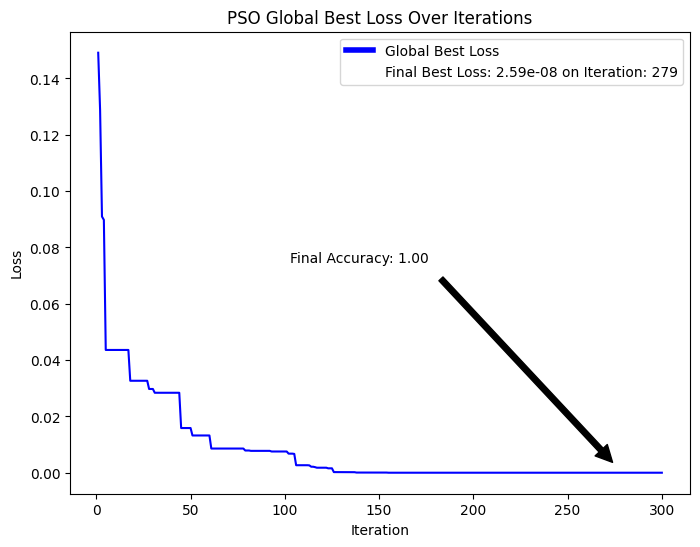

In [11]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=100,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))


# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### Population size = 150

Iteration 25/300, Current Best Loss: 0.021975423095082592
Iteration 50/300, Current Best Loss: 0.0008457686172791785
Iteration 75/300, Current Best Loss: 1.3905468312668775e-05
Iteration 100/300, Current Best Loss: 1.2581233468312939e-05
Iteration 125/300, Current Best Loss: 9.99240695749345e-07
Iteration 150/300, Current Best Loss: 8.456649640206991e-07
Iteration 175/300, Current Best Loss: 7.757370433125447e-07
Iteration 200/300, Current Best Loss: 4.81126516741108e-07
Iteration 225/300, Current Best Loss: 2.841157237140188e-07
Iteration 250/300, Current Best Loss: 1.571221343689693e-07
Iteration 275/300, Current Best Loss: 6.005841286402352e-08
Iteration 300/300, Current Best Loss: 3.389481060794035e-08
Final Best Loss: 3.389481060794035e-08 on Iteration: 295
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro 

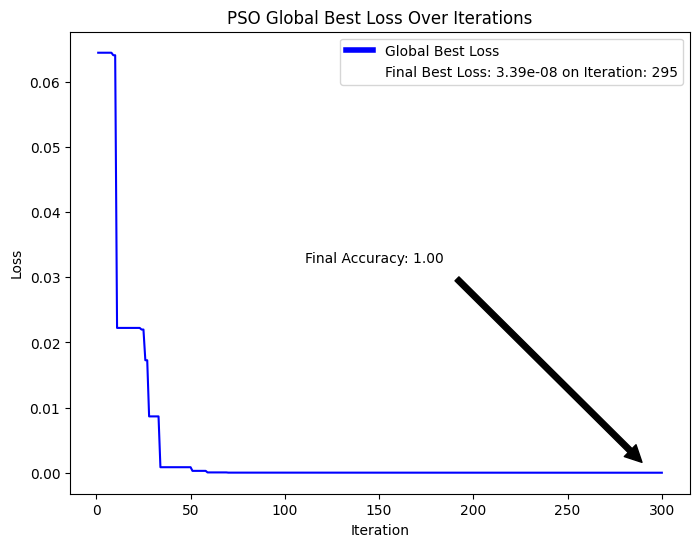

In [12]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=150,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

## Max_iterations adjusting

### Max_iter = 50

Iteration 25/50, Current Best Loss: 0.03006511062361988
Iteration 50/50, Current Best Loss: 0.004654219048031615
Final Best Loss: 0.004654219048031615 on Iteration: 44
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.98      1.00      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



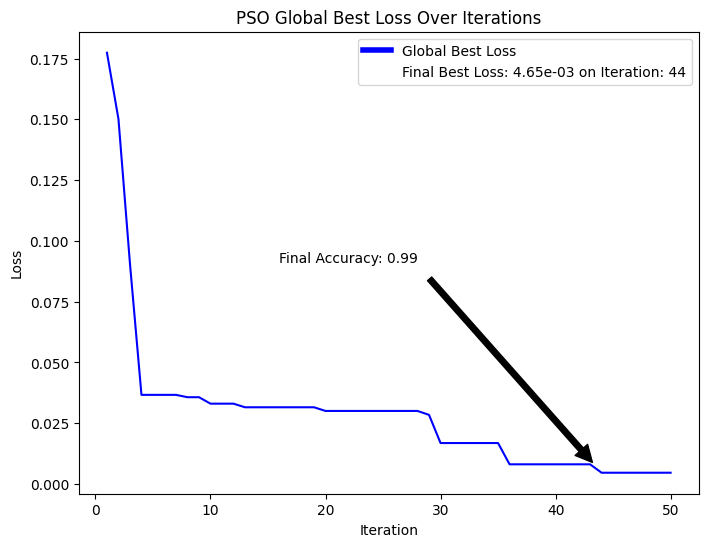

In [13]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=50,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

# Max_iter = 100

Iteration 25/100, Current Best Loss: 0.03006511062361988
Iteration 50/100, Current Best Loss: 0.004654219048031615
Iteration 75/100, Current Best Loss: 0.002589184775738911
Iteration 100/100, Current Best Loss: 7.150483924442828e-06
Final Best Loss: 7.150483924442828e-06 on Iteration: 92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



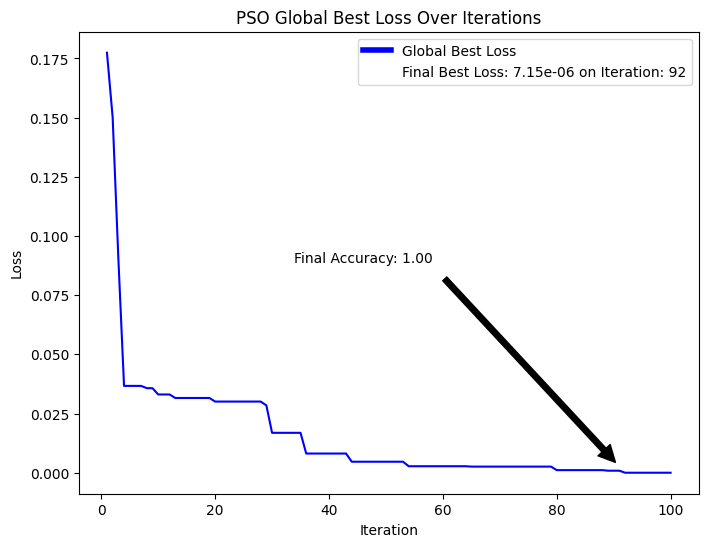

In [14]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=100,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

## Architectures:

### [4, 8, 1]

Iteration 25/300, Current Best Loss: 0.03006511062361988
Iteration 50/300, Current Best Loss: 0.004654219048031615
Iteration 75/300, Current Best Loss: 0.002589184775738911
Iteration 100/300, Current Best Loss: 7.150483924442828e-06
Iteration 125/300, Current Best Loss: 1.6912859061244844e-10
Iteration 150/300, Current Best Loss: 1.6912859061244844e-10
Iteration 175/300, Current Best Loss: 1.6912859061244844e-10
Iteration 200/300, Current Best Loss: 1.6518846255136701e-12
Iteration 225/300, Current Best Loss: 8.381927088513221e-13
Iteration 250/300, Current Best Loss: 2.7643623415401346e-13
Iteration 275/300, Current Best Loss: 2.2674668266009894e-13
Iteration 300/300, Current Best Loss: 9.35565370874332e-14
Final Best Loss: 9.35565370874332e-14 on Iteration: 298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro

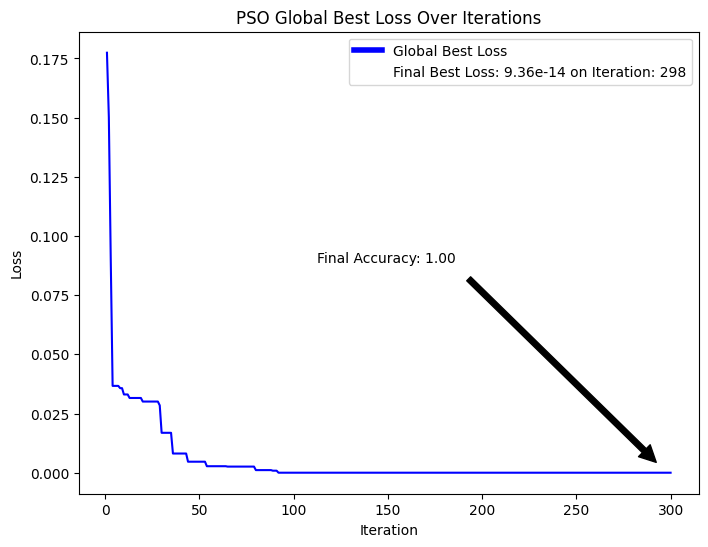

In [15]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### [4, 16, 1]

Iteration 25/300, Current Best Loss: 0.016413605503944446
Iteration 50/300, Current Best Loss: 0.0066310519473096645
Iteration 75/300, Current Best Loss: 0.0066310519473096645
Iteration 100/300, Current Best Loss: 0.002263248705165101
Iteration 125/300, Current Best Loss: 0.001058347360514078
Iteration 150/300, Current Best Loss: 0.000940408183076338
Iteration 175/300, Current Best Loss: 0.0003446900004482942
Iteration 200/300, Current Best Loss: 1.5080623636801333e-07
Iteration 225/300, Current Best Loss: 7.573083963225944e-08
Iteration 250/300, Current Best Loss: 4.600681582942979e-09
Iteration 275/300, Current Best Loss: 3.5833803569901954e-09
Iteration 300/300, Current Best Loss: 3.1819119350763213e-09
Final Best Loss: 3.1819119350763213e-09 on Iteration: 282
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro

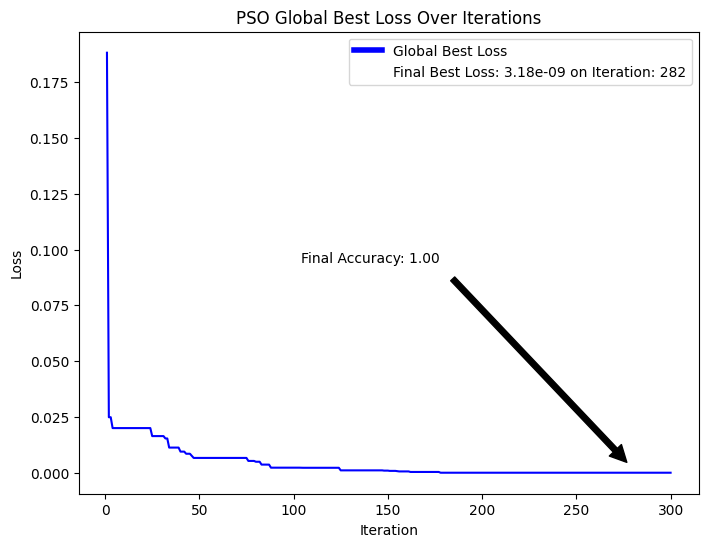

In [16]:
# Defining the network architecture and activation functions
architecture = [4, 16, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### [4, 100, 1]

Iteration 25/300, Current Best Loss: 0.030114713111481048
Iteration 50/300, Current Best Loss: 0.012762078396150504
Iteration 75/300, Current Best Loss: 0.012762078396150504
Iteration 100/300, Current Best Loss: 0.012762078396150504
Iteration 125/300, Current Best Loss: 0.005469462169553351
Iteration 150/300, Current Best Loss: 0.0027347310847766638
Iteration 175/300, Current Best Loss: 0.0027347310847766638
Iteration 200/300, Current Best Loss: 0.0027347310847766638
Iteration 225/300, Current Best Loss: 0.0027347310847766638
Iteration 250/300, Current Best Loss: 0.0027347310847766638
Iteration 275/300, Current Best Loss: 0.0027347310847766638
Iteration 300/300, Current Best Loss: 0.0027347310847766638
Final Best Loss: 0.0027347310847766638 on Iteration: 143
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       148
           1       0.99      1.00      1.00       127

    accuracy                           1.00       275
   macro avg 

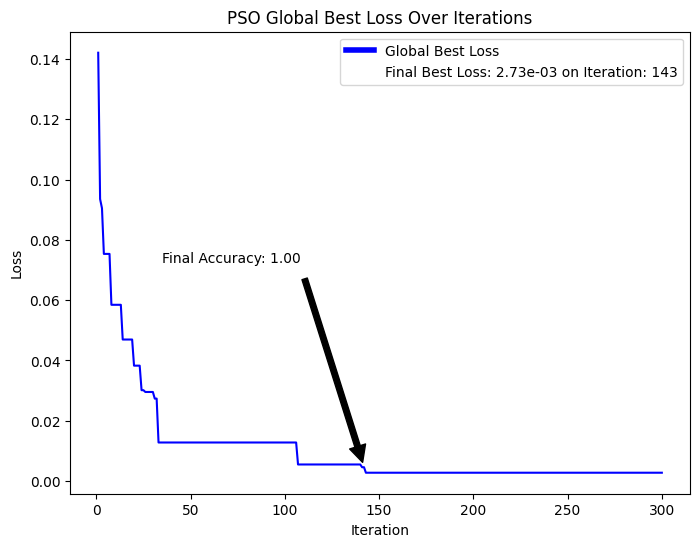

In [17]:
# Defining the network architecture and activation functions
architecture = [4, 100, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### [4, 8, 8, 1]

Iteration 25/300, Current Best Loss: 0.07748404740361126
Iteration 50/300, Current Best Loss: 0.03555150410209663
Iteration 75/300, Current Best Loss: 0.03190519598906107
Iteration 100/300, Current Best Loss: 0.004557885141294439
Iteration 125/300, Current Best Loss: 0.004557885141294439
Iteration 150/300, Current Best Loss: 0.0027347310847766638
Iteration 175/300, Current Best Loss: 0.0027347310847766638
Iteration 200/300, Current Best Loss: 0.0027347310847766638
Iteration 225/300, Current Best Loss: 0.0027347310847766638
Iteration 250/300, Current Best Loss: 0.0027347310847766638
Iteration 275/300, Current Best Loss: 0.0027347310847766638
Iteration 300/300, Current Best Loss: 0.0027347310847766638
Final Best Loss: 0.0027347310847766638 on Iteration: 145
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       148
           1       0.99      1.00      1.00       127

    accuracy                           1.00       275
   macro avg    

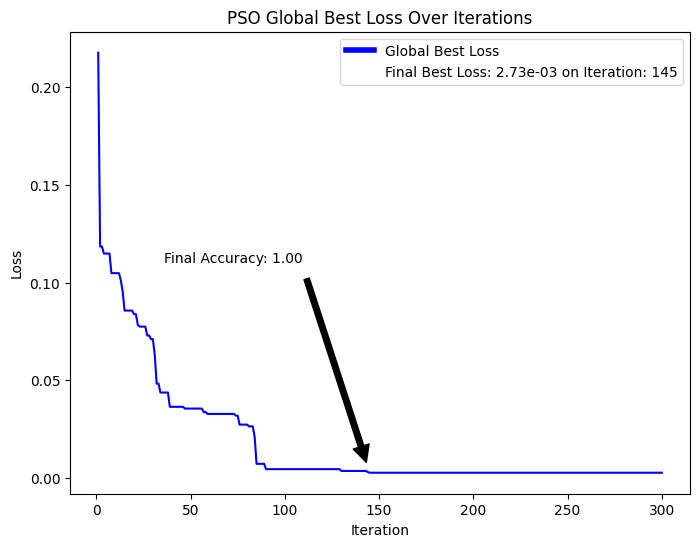

In [18]:
# Defining the network architecture and activation functions
architecture = [4, 8, 8, 1]  # Network architecture
activations = ['relu', 'relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

## Activation Functions

### [relu, logistic]

Iteration 25/300, Current Best Loss: 0.03006511062361988
Iteration 50/300, Current Best Loss: 0.004654219048031615
Iteration 75/300, Current Best Loss: 0.002589184775738911
Iteration 100/300, Current Best Loss: 7.150483924442828e-06
Iteration 125/300, Current Best Loss: 1.6912859061244844e-10
Iteration 150/300, Current Best Loss: 1.6912859061244844e-10
Iteration 175/300, Current Best Loss: 1.6912859061244844e-10
Iteration 200/300, Current Best Loss: 1.6518846255136701e-12
Iteration 225/300, Current Best Loss: 8.381927088513221e-13
Iteration 250/300, Current Best Loss: 2.7643623415401346e-13
Iteration 275/300, Current Best Loss: 2.2674668266009894e-13
Iteration 300/300, Current Best Loss: 9.35565370874332e-14
Final Best Loss: 9.35565370874332e-14 on Iteration: 298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro

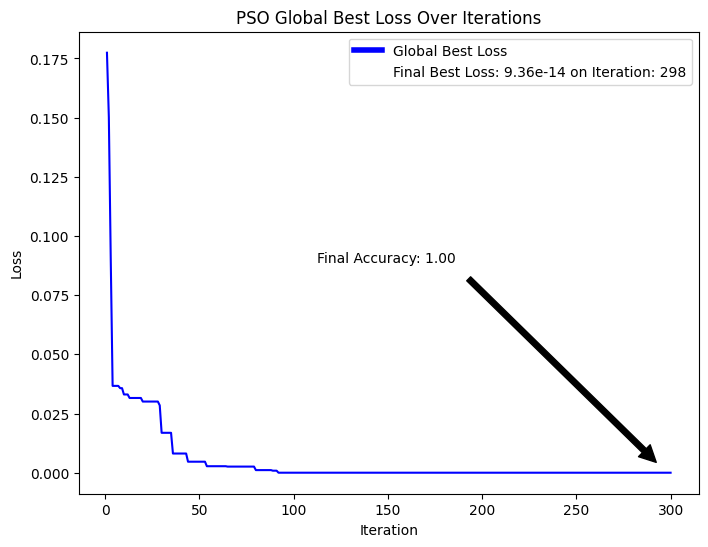

In [19]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['relu', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()

### [tanh, logistic]

Iteration 25/300, Current Best Loss: 0.04316271358733911
Iteration 50/300, Current Best Loss: 0.010483263205379923
Iteration 75/300, Current Best Loss: 0.003479142854626974
Iteration 100/300, Current Best Loss: 0.0008518248361304217
Iteration 125/300, Current Best Loss: 0.0002614318372677715
Iteration 150/300, Current Best Loss: 0.00017709832250341416
Iteration 175/300, Current Best Loss: 4.2432852130138766e-05
Iteration 200/300, Current Best Loss: 1.690536345429166e-05
Iteration 225/300, Current Best Loss: 8.351006043255164e-06
Iteration 250/300, Current Best Loss: 1.6102471411371254e-06
Iteration 275/300, Current Best Loss: 1.01938406714769e-06
Iteration 300/300, Current Best Loss: 3.4789351912316567e-07
Final Best Loss: 3.4789351912316567e-07 on Iteration: 299
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       127

    accuracy                           1.00       275
   macro

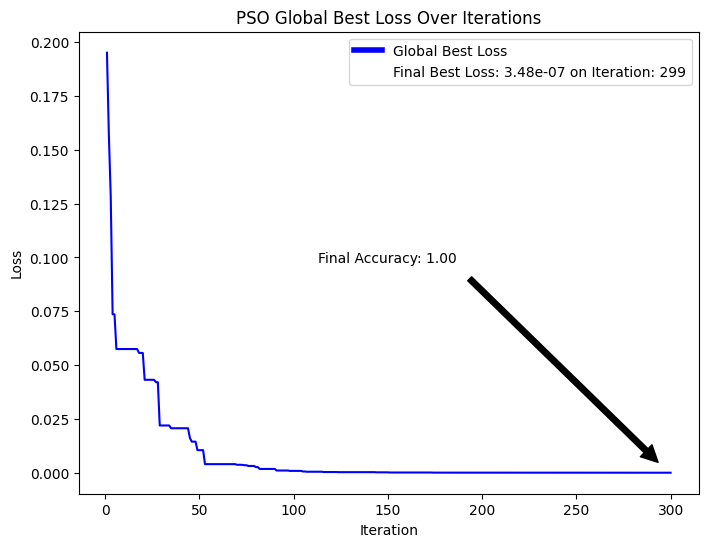

In [20]:
# Defining the network architecture and activation functions
architecture = [4, 8, 1]  # Network architecture
activations = ['tanh', 'logistic']  # Activation functions

# Use the build_network function to create the network
network = build_network(architecture, activations)

# Get the dimensionality of the network weights vector
dimensions = network.total_weights()

# Call pso_optimization function with the created network and parameters
best_weights = pso_optimization(
    num_particles=50,
    num_iterations=300,
    loss_func=mse_loss,
    network=network,
    train_data=X_train_scaled,
    train_labels=y_train,
    dimensions=dimensions)

# Set the best weights to the network
network.set_weights(best_weights)

# Test the network
output = network.forward(X_test_scaled)
predictions = (output > 0.5).astype(int)

# Print the results
print(classification_report(y_test, predictions))

# Calculate the final accuracy
final_accuracy = np.mean(predictions == y_test)

# Get the final best loss and the iteration number
final_best_loss_iteration = min(
    global_best_loss_history, key=global_best_loss_history.get)
final_best_loss = global_best_loss_history[final_best_loss_iteration]

# Create custom legend items
custom_lines = [Line2D([0], [0], color='blue', lw=4)]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(list(global_best_loss_history.keys()), list(
    global_best_loss_history.values()), label='Global Best Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('PSO Global Best Loss Over Iterations')

# Annotate the final accuracy at the last point
plt.annotate(f'Final Accuracy: {final_accuracy:.2f}',
             xy=(final_best_loss_iteration, final_best_loss),
             xytext=(final_best_loss_iteration/2, final_best_loss +
                     (max(global_best_loss_history.values()) - final_best_loss) / 2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='center')

# Create the legend with custom entry for final best loss
legend_labels = ['Global Best Loss',
                 f'Final Best Loss: {final_best_loss:.2e} on Iteration: {final_best_loss_iteration}']

# Add custom legend entries
plt.legend([Line2D([0], [0], color='blue', lw=4)] +
           [Line2D([0], [0], color='white', lw=0, label=legend_labels[1])], legend_labels)

plt.show()